# Exploratory Data Analysis (EDA) and Visualization of the data

In this session, we will learn how to do the mandatory first step of any machine learning project: exploring the data that we are working with.

First, however, we will do some necessary installations. For this session, we will work with the packages pandas and matplotlib:

In [ ]:
!pip install pandas matplotlib

## Why?

All machine learning projects have an essential element to them: **the data**.
It does not matter what type of data you have, you always have to analyze it first. Why is this so important?

- **Usually, the data is not clean**. We are humans, and most of us are not used to creating data bases. Most of the gathered data in the world comes from messy sources, where the data is not properly represented. There will be missing values, samples with errors, outliers, etc. It is our job to *clean* the data and make it easier for the model (the computer) to understand it.
- **Sometimes, there are patterns WE can see**. Correlations in the data are common, but most of the time we cannot see them. We use machine learning models so that they can learn these correlations for us. However, sometimes there are simpler correlations that we can see with a basic analysis of the data. With this, we have more information, and we can always use more information to our advantage.
- **Getting a deeper understanding of the data**. If you do not understand the data, you will not understand why your model is not working. Understanding the nature of it will help us taking decisions in the steps that come after the analysis: choosing a model, selecting the hyperparameters to train it, understanding why it works or fails, etc.
- **Preprocessing of the data**. Sometimes, the model requires us to do some changes in the data, represent some values in a different way. With the analysis, we understand better what changes we can do.
- **And the most important: the model will only be as good as your data**. If your data does not represent with precision the underlying patterns that we want our model to learn, how is the model going to learn them? Spoiler: it won't.

**The most important thing on a machine learning project is the data. That is everything the model knows, so we have to make sure its source of knowledge is as good as it can possibly be**.

## How?

Now that we know why we have to do an exploration of the data, let's focus on the how. For that, we will need a dataset to explore. In our case, it will be the **California Housing Prices dataset**.

Run the following cell to download it:

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

### A quick glance

To explore the data, we use `pandas`. With this library, the data is organized in a table (just like in an excel). The tables are called DataFrames. `pandas` allows us to perform some basic operations to see the information from the dataset. After running the code above, our DataFrame is stored in the variable `housing`. We can see the head (the first rows of the DataFrame) with the following code:

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row is **a sample, a data point**. In this particular case, each row represents a different district. For each district, we have 10 attributes to describe it: `longitude`, `latitude`, `housing_median_age`, etc.

Now we know what we have to work with, what kind of data is in our dataset and how it is structured. Most of our data is numerical, except the last column, which seems categorical. The following command is to get a broader picture of the dataset:

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


For each column, it gives you the amount of non-null (valid) values it has and the type of data it is (`float64` are decimal numbers represented with 64 bits). As we can see, the `total_bedrooms` attribute has some missing values, since we have a total of 20640 instances, but only 20433 non-null values for that attribute. We will have to take care of that later...

Let's see a statistical summary of our data with the following method:

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


For the categorical data, we can see how many values there are and how many times they appear:

In [ ]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Another quick way of seeing the bigger picture of the data is to plot a histogram for each numerical attribute. We can see how it is distributed, getting an insight on what values are more and less common in each case.

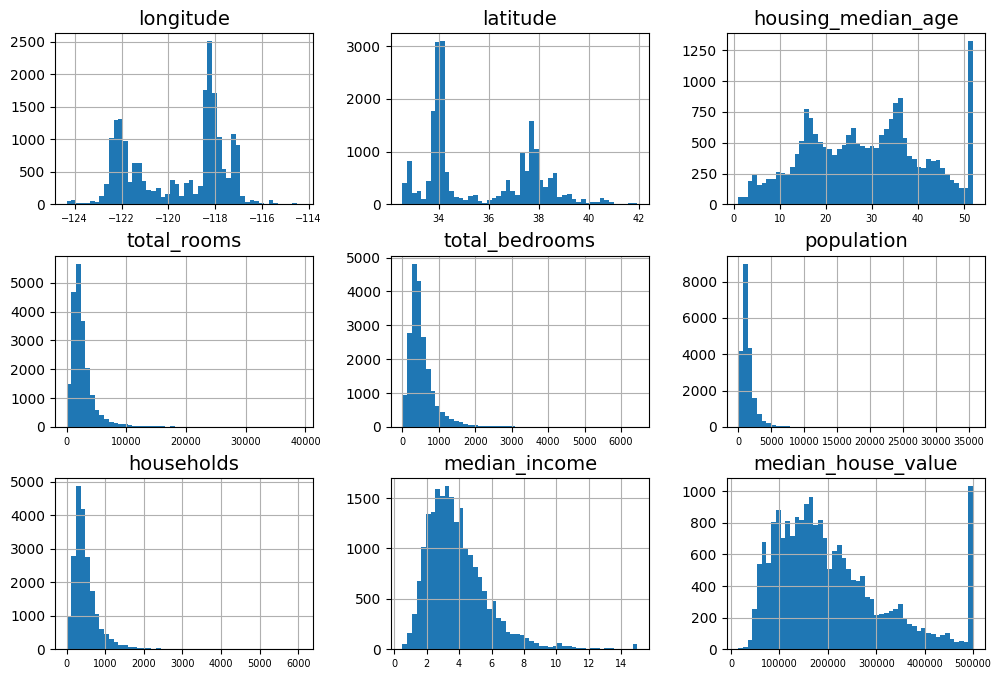

In [22]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
plt.show()

#### Q: What conclusions can we extract until now?

### Explore and visualize

We have taken a quick glance at the data. Now, it is time to explore it deeper. We can do that by trying to visualize it in different ways and trying to correlate the different attributes.

Since the dataset contains Geographical data, we can visualize it as in a map:

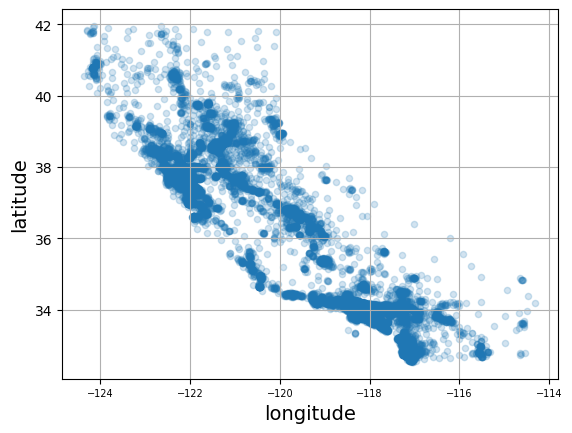

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

By setting the alpha value to a low value, we can see which areas of California are more district dense (the areas where the points are on top of each other).

The plotting tool from `pandas` allows us to play a bit more with the data. We can play with the radius and color of the circles. Let's make them bigger depending on the population and redder depending on the median house value (how expensive the houses are).

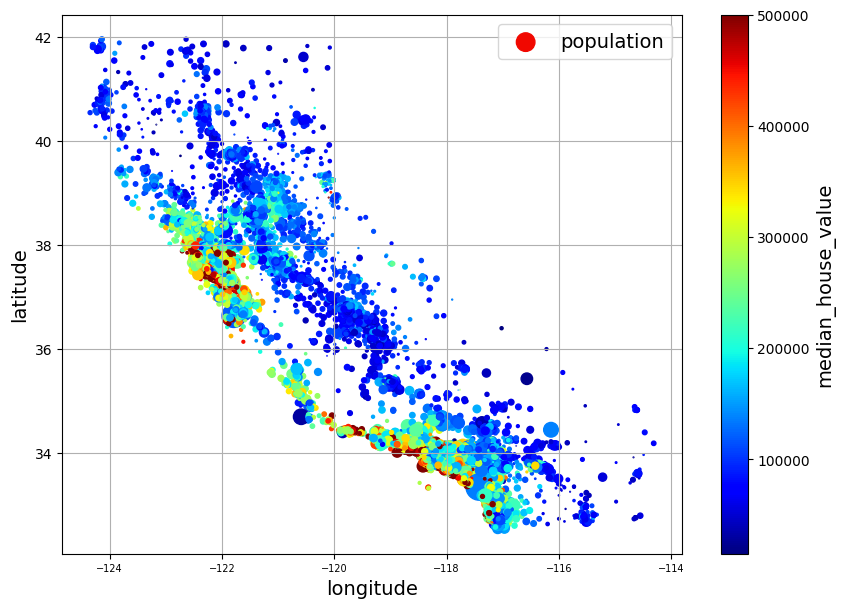

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             legend=True, sharex=False, figsize=(10,7))
plt.legend()
plt.show()

From this, we can extract that the housing prices are very much related to their geographical location and the population density (we knew this already).

Now, we can look for correlations between our attributes. With the following piece of code, we can extract the correlation matrix between our attributes. It computes the Pearson coefficient: -1 means there is a negative correlation, 0 means there is no correlation, and 1 means there is positive correlation.

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


Here, we see what the correlation is between the median house value (our target attribute, the one we want the model to predict) and the rest of the attributes. Another way to see the correlations is to plot each attribute with the other ones, and look at the graphs ourselves to see if there is a tendency.

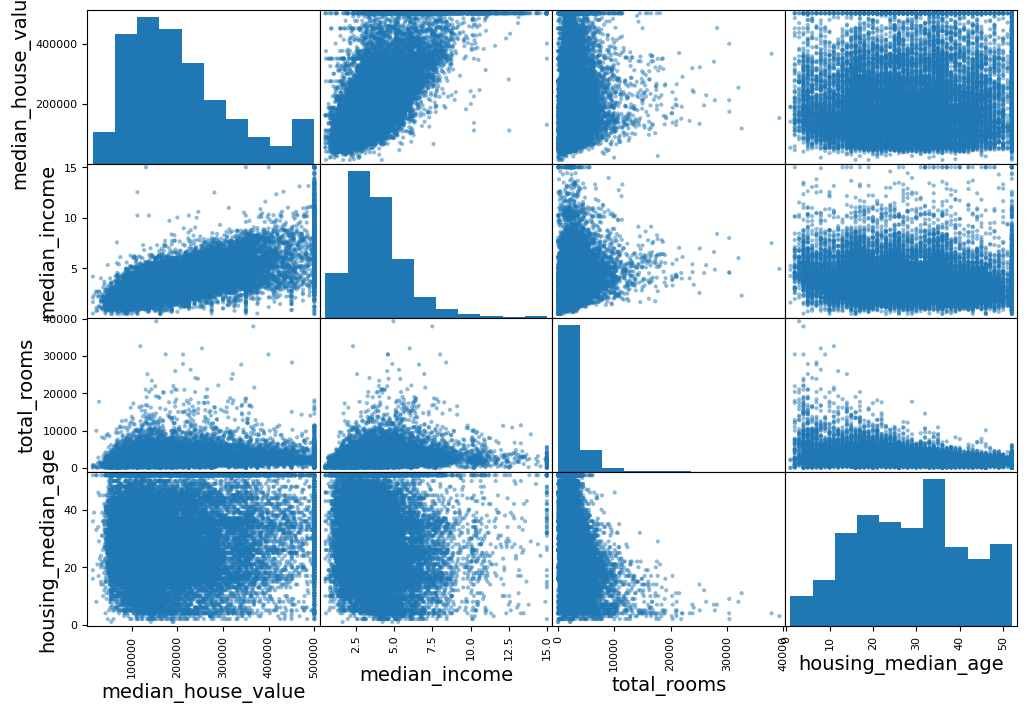

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()


*Note: sometimes, correlations between our attributes can be bad for the model. When two attributes are strongly correlated and they do not provide any other interaction or correlation with any other attribute, it can be as passing the same value twice to the model, adding redundancy to our data. It can make the process of learning more difficult for the model and it adds unnecessary computation. However, to get rid of one of the attributes, we have to make sure that it does not have correlations with the other ones that might be useful to the model, and that is more difficult to find*.

### Feature engineering

The raw data is usually not in the best shape for the model. However, we can create new attributes with the data we already have that might represent more useful information. This process is called **feature engineering**, which consists of transforming and enhancing the data to help the model make better decisions.

In our dataset, for example, the total number of rooms or bedrooms in a district is not useful if you do not know how many households there are. We can play with these attributes, and come up with newer ones. We can come up with, for example, a mean value for the rooms per house, a bedroom ratio (how many bedrooms per room there are) and a mean value for the people per house:

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_household"] = housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
people_per_household,-0.023737
population,-0.024650
longitude,-0.045967


### Preparing the data for the ML algorithms



We have explored the data. Now, we have to prepare it so that the algorithms can understand it.

#### Clean the Data

ML algorithms cannot work with missing values. As we saw before, there are some samples (districts) that lack the `total_bedrooms` attribute.

In [3]:
null_rows_idx = housing.isnull().any(axis=1)
housing[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND


So, what can we do with those samples? We have three options:
- Get rid of them (reducing the total amount of data and some information about the districts).
- Get rid of the whole attribute (including the samples that do have it).
- Set the missing values to some value.

In [6]:
# housing.dropna(subset=["total_bedrooms"])    # option 1
# housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()
housing.fillna({"total_bedrooms": median}, inplace=True) # option 3

Option 3 is always the least destructive, since you keep all of the information you had before. There are a lot of ways of inputting missing data; this is one of the simplest forms.

#### Handling text and categorical attributes

Contrary to what now is popular believe, the ML algorithms cannot understand language. They only understand numbers. When we have some attribute that is text or categorical, we have to transform it to something they can understand.

In [7]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.sample(8)

,ocean_proximity
10708,<1H OCEAN
10695,<1H OCEAN
15218,<1H OCEAN
14648,NEAR BAY
19803,<1H OCEAN
11777,INLAND
8802,INLAND
18070,<1H OCEAN


So, how can we transform these kind of attributes to a form the computer can understand? We turn them into numbers, but how?

We could assign a number to each in ascending order, for example.

In [13]:
from sklearn.preprocessing import OrdinalEncoder
from numpy.random import choice

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
choice(housing_cat_encoded.flatten(), 8)

array([1., 0., 1., 4., 0., 0., 1., 1.])

In [14]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Each value from this specific attribute has been transformed into a number. However, there is a problem. When we assign numbers in ascending order, the computer understands that, between the values that are close, there is a "proximity". This is useful when our values could be something like "high, medium, low". This is not our case. So what do we do? **One hot encoding**.

In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Now we have created a new column in our DataFrame for each value in the "ocean_proximity" attribute. This way, we do not confuse the computer with proximity between values that is not real.

In [16]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


#### Feature scaling

Our numerical values will always have different ranges, because of the nature of the data. The number of bedrooms per house might go between the values 1 and 10, and the cost of a house might go between 100,000 to 2,500,000. This might be problematic in the training phase (we will understand this better in the next few weeks).

For now, you only need to understand that, if the model sees that an attribute has values that are higher, it will give more importance to that attribute than others.

So, we have to do something calles **feature scaling**. It is a technique to adjust the values of our data so that all features (attributes, columns) are on a similar scale, usually a small consistent range, like (0, 1) or (-1, 1).

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num = housing.select_dtypes(include=[np.number])
housing_scaled = min_max_scaler.fit_transform(housing_num)
housing_scaled

array([[-0.57768924,  0.13496281,  0.56862745, ..., -0.95888834,
         0.07933684,  0.80453276],
       [-0.57569721,  0.13071201, -0.21568627, ..., -0.62604835,
         0.07605412,  0.41649313],
       [-0.57968127,  0.12858661,  1.        , ..., -0.94211478,
        -0.06794389,  0.39010148],
       ...,
       [-0.37649402,  0.46439957, -0.37254902, ..., -0.85791811,
        -0.83447125, -0.6812343 ],
       [-0.39641434,  0.46439957, -0.33333333, ..., -0.88554514,
        -0.8114095 , -0.71257438],
       [-0.38047809,  0.45164718, -0.41176471, ..., -0.82601546,
        -0.73949325, -0.69319302]])

With the MinMaxScaler, we can set every numerical value in the range we specify as input (in this case, -1 to 1).

That is not the only way to do it. Sometimes, it might interest us to change the distribution of some of the attributes. As we saw before, there are some that are skewed right, where the lower values are more common than the bigger ones.

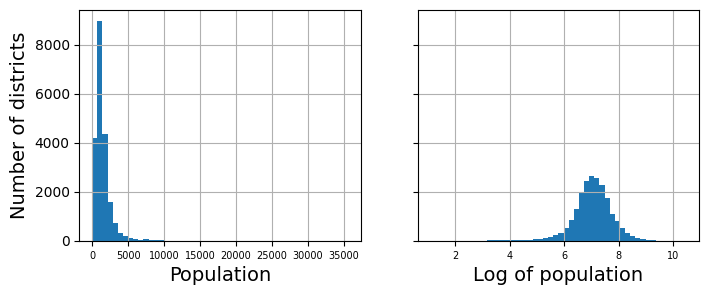

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()